In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plot style
sns.set_style('whitegrid')

In [111]:
%matplotlib inline  

In [112]:
df = pd.read_csv("articles_programs_used.csv")

## Time period

In [113]:
str(int(df.year.min())) +" - "+ str(int(df.year.max()))

'1999 - 2018'

## Journal name and number of entries

In [114]:
df.journal.value_counts()

American Economic Review    1462
Name: journal, dtype: int64

## Software use per year

In [115]:
df1 = df[['year','stata', 'julia', 'python','R','C','C++','matlab','fortran','sas']]
pl = df1.groupby('year').sum()
pl.drop(pl.index[[0, 1]], inplace=True)
pl['year'] = pl.index.astype(int)
pl

,stata,julia,python,R,C,C++,matlab,fortran,sas,year
year,,,,,,,,,,
2002.0,0,0,0,0,0,0,0,0,1,2002
2004.0,4,0,0,0,0,0,1,0,1,2004
2005.0,22,0,0,0,0,1,9,0,3,2005
2006.0,21,0,0,0,1,0,10,0,3,2006
2007.0,19,0,0,0,2,0,13,3,6,2007
2008.0,23,0,1,0,0,0,9,4,3,2008
2009.0,24,0,0,0,0,0,19,2,2,2009
2010.0,31,0,0,1,1,0,7,2,1,2010
2011.0,58,0,1,2,1,0,24,3,3,2011


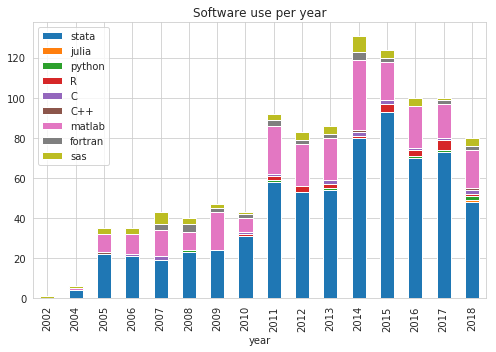

In [116]:
ax = pl[["year", 'stata', 'julia', 'python','R','C','C++','matlab','fortran','sas']].plot(x='year', 
                                                                                          kind="bar", 
                                                                                          stacked=True, 
                                                                                          figsize=(7, 5))
ax.set_title("Software use per year")
plt.tight_layout()
plt.savefig('software-use.png', dpi=100)

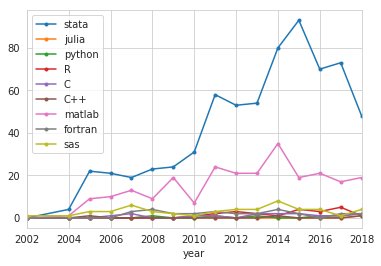

In [117]:
pl.plot(x='year', y=['stata', 'julia', 'python','R','C','C++','matlab','fortran','sas'], kind="line", marker='.')

## Number of software tools used per publication 

  - Listed software tools: stata, julia, python, R, C, C++, matlab, fortran, sas.
  - Authors may have used none or one or more software tools per publication. 
  - There are entries with null values that we do not count.

In [118]:
s = df[['stata', 'julia', 'python','R','C','C++','matlab','fortran','sas']]
no_sw = s.sum(axis=1).astype(int).value_counts(sort=False)
no_sw

0    590
1    710
2    154
3      4
4      4
dtype: int64

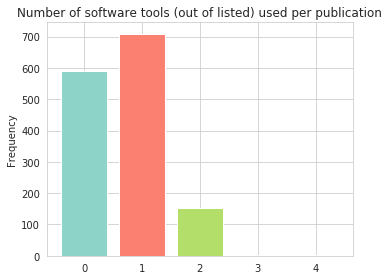

In [119]:
height = no_sw.values
bars = no_sw.index
y_pos = np.arange(len(bars))
colors = plt.cm.Set3(np.linspace(0,1,len(bars)))
# Create bars
fig = plt.figure(figsize=(5.5,4))
plt.bar(y_pos, height, color=colors, edgecolor='white')
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylabel("Frequency")
plt.title("Number of software tools (out of listed) used per publication")

plt.tight_layout()

## Software use all time

In [120]:
a=df.sum()
df1 = a[['stata', 'julia', 'python','R','C','C++','matlab','fortran','sas']]
df1

stata      673
julia        1
python       7
R           22
C           15
C++          3
matlab     245
fortran     28
sas         52
dtype: object

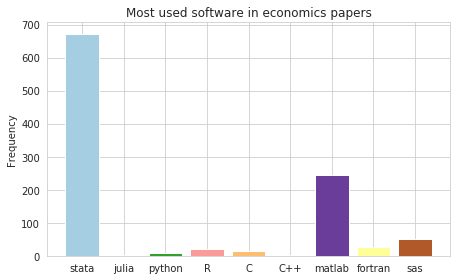

In [121]:
height = df1.values
bars = df1.index
y_pos = np.arange(len(bars))
colors = plt.cm.Paired(np.linspace(0,1,len(bars)))
 
# Create bars
fig = plt.figure(figsize=(6.5,4))
plt.bar(y_pos, height, color=colors, edgecolor='white')
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=0)
plt.ylabel("Frequency")
plt.title("Most used software in economics papers")
plt.tight_layout()

## Software use in percentage 

In [122]:
from __future__ import division
pom = (df1.values * 100 / df1.values.sum())
pom

array([64.34034416826003, 0.09560229445506692, 0.6692160611854685,
       2.1032504780114722, 1.4340344168260037, 0.28680688336520077,
       23.422562141491397, 2.676864244741874, 4.97131931166348],
      dtype=object)

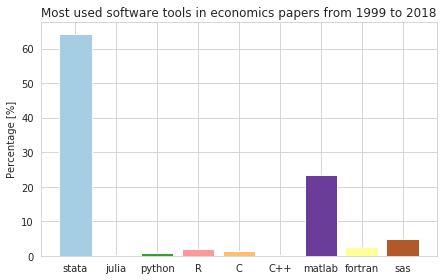

In [123]:
height = pom
bars = df1.index
y_pos = np.arange(len(bars))
colors = plt.cm.Paired(np.linspace(0,1,len(bars)))
 
# Create bars
fig = plt.figure(figsize=(6.5,4))

plt.bar(y_pos, height, color=colors, edgecolor='white')
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=0)
plt.ylabel("Percentage [%]")
plt.title("Most used software tools in economics papers from 1999 to 2018")
plt.tight_layout()

plt.savefig('software-all-time.png', dpi=100)

## Pie chart (version 1)

(-1.675893300409121,
 1.1274234984183888,
 -2.4813907001105893,
 1.1739258872914757)

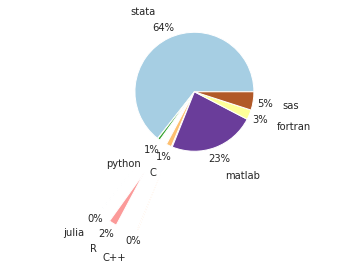

In [124]:
explode=(0,1.5,0,1.6,0,1.5,0,0,0)
plt.pie(df1, labels=df1.index, 
        autopct='%1.0f%%', 
        pctdistance=1.2, 
        labeldistance=1.5, 
        colors = colors, 
        explode = explode)
plt.axis('equal')

## Pie chart (version 2)

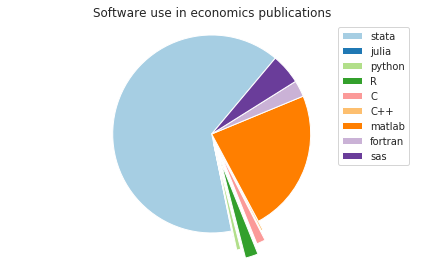

In [125]:
colors = plt.cm.Paired(np.linspace(0,1,11))
explode=(0,0.1,0.2,0.3,0.2,0.1,0,0,0)
patches, text = plt.pie(df1,
           startangle=50, colors = colors, explode = explode)
plt.axis('equal')

plt.legend(patches, df1.index, loc="best")
plt.title("Software use in economics publications")
plt.tight_layout()